In [484]:
import numpy as np
import pandas as pd

In [485]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [486]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [487]:
df.shape

(5572, 5)

# Data cleaning

# EDA

# Text preprocessing

# Model building

# Evaluation

# Improvements

# Website

# Deployment

# Data cleaning

In [488]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [489]:
# drop last 3 columns

In [490]:
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [491]:
df.sample(5)

,v1,v2
3142,ham,Boy; I love u Grl: Hogolo Boy: gold chain kods...
243,ham,Although i told u dat i'm into baig face watch...
262,ham,MY NO. IN LUTON 0125698789 RING ME IF UR AROUN...
450,ham,hanks lotsly!
2869,spam,YOUR CHANCE TO BE ON A REALITY FANTASY SHOW ca...


In [492]:
# renaming the columns 

In [493]:
df.rename(columns = {'v1' : 'target', 'v2' : 'text'}, inplace = True)

In [494]:
df.sample(5)

,target,text
780,ham,Your opinion about me? 1. Over 2. Jada 3. Kusr...
1370,ham,Hope you are feeling great. Pls fill me in. Ab...
3433,ham,Sending you greetings of joy and happiness. Do...
2245,ham,How did you find out in a way that didn't incl...
1131,ham,"Sorry, I'll call later"


In [495]:
# label encoding

In [496]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [497]:
df['target'] = encoder.fit_transform(df['target'])

In [498]:
# ham -> 0
# spam -> 1

In [499]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [500]:
# checking for missing values 

In [501]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [502]:
# checking duplicacy

In [503]:
# checking in text column

In [504]:
df.duplicated().sum()

403

In [505]:
# removing duplicacy

In [506]:
df = df.drop_duplicates(keep = 'first')

In [507]:
df.duplicated().sum()

0

In [508]:
df.shape

(5169, 2)

# EDA

In [509]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [510]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

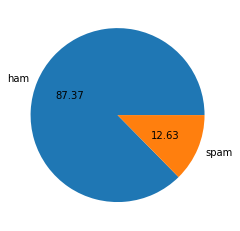

In [511]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels = ['ham', 'spam'], autopct = '%0.2f')
plt.show()

In [512]:
# imbalanced dataset

In [513]:
import nltk

In [514]:
 nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/vibhoosrivastava/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [515]:
# counting number of characters

In [516]:
df['num_characters'] = df['text'].apply(len)

In [517]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [518]:
# counting number of words

In [519]:
# tokenization on the basis of words

In [520]:
df['text'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [521]:
# counting

In [522]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [523]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [524]:
# counting number of sentences

In [525]:
df['num_sentences'] = df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [526]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [527]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [528]:
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [529]:
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [530]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

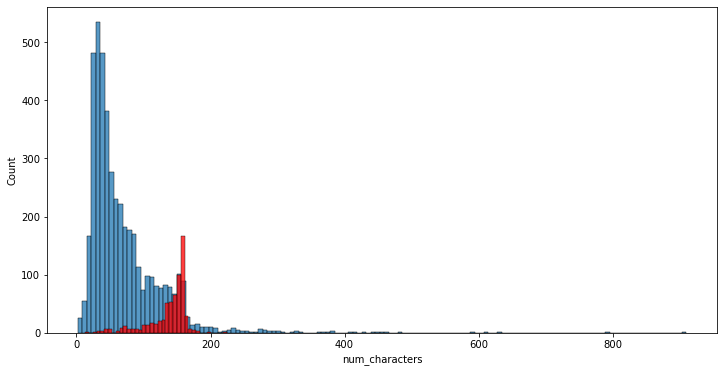

In [531]:
plt.figure(figsize = (12, 6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color = 'red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

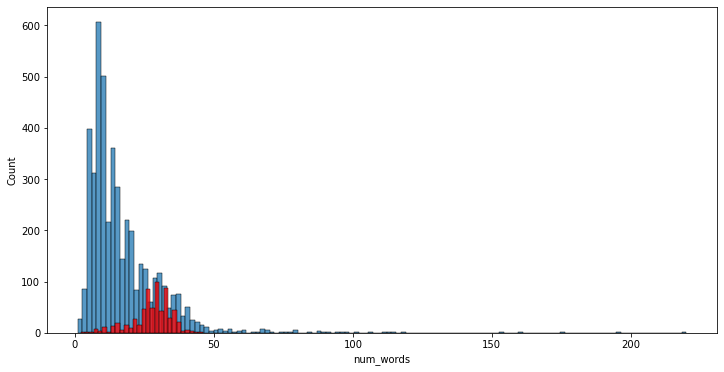

In [532]:
plt.figure(figsize = (12, 6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color = 'red')

<AxesSubplot:xlabel='num_sentences', ylabel='Count'>

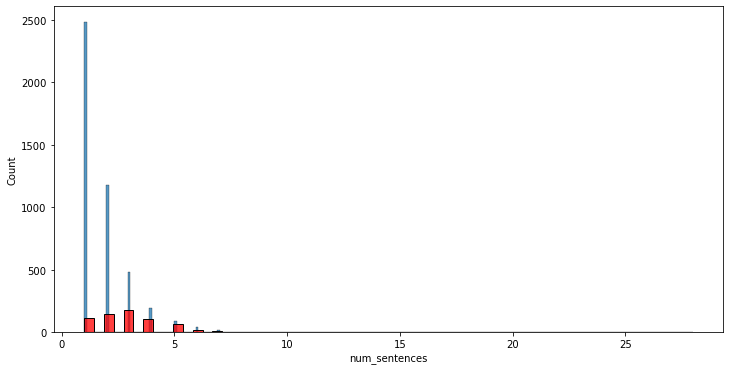

In [533]:
plt.figure(figsize = (12, 6))
sns.histplot(df[df['target'] == 0]['num_sentences'])
sns.histplot(df[df['target'] == 1]['num_sentences'], color = 'red')

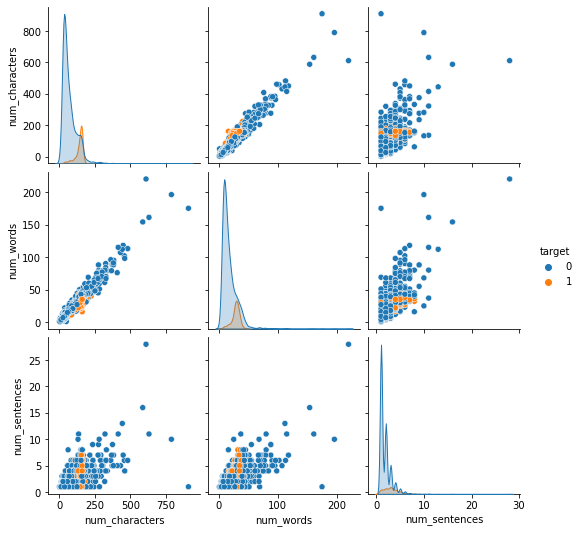

In [534]:
sns.pairplot(df, hue = 'target')

In [535]:
# finding pearson correlation coeff

<AxesSubplot:>

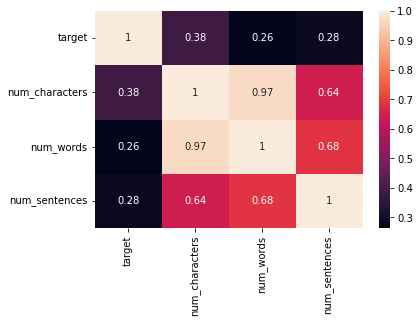

In [536]:
sns.heatmap(df.corr(), annot = True)

In [537]:
# spam means 1 in target column
# ham means 0 in target column
# outliers are present
# when number of characters increases probability/tendancy of spam increases
# when number of words increases probability/tendancy of spam increases
# when number of sentences increases probability/tendancy of spam increases

In [538]:
# we can't keep all 3 columns 
# because of strong correlation among them
# we will only consider number of charcters column because it has the strongest correlation with the target column

# Text preprocessing

In [539]:
# lowercase
# tokenization
# removing special characters
# removing stop words
# removing punctuation marks
# stemming -> dancing -> dance
# lemmatization -> better -> good

In [540]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [541]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [542]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [543]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return ' '.join(y)

In [544]:
transform_text('is the hi')

'hi'

In [545]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [546]:
transform_text(df['text'][10])

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [547]:
df['transformed_text'] = df['text'].apply(transform_text)

In [548]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [549]:
# word cloud or word map

In [550]:
!pip install wordcloud

In [551]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')

In [552]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = ' '))

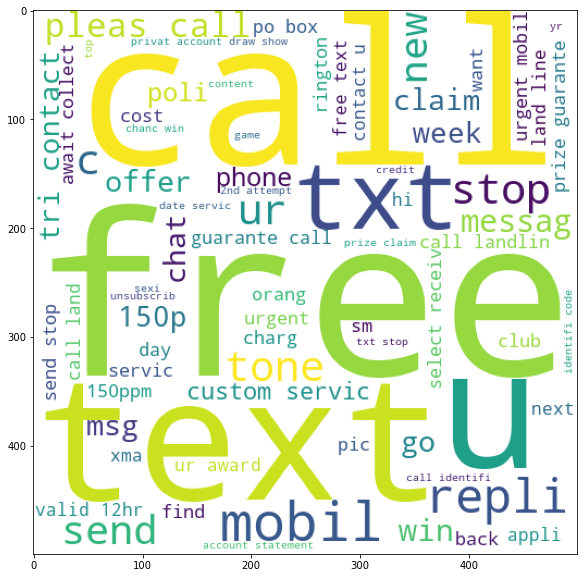

In [553]:
plt.figure(figsize = (20, 10))
plt.imshow(spam_wc)

In [554]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep = ' '))

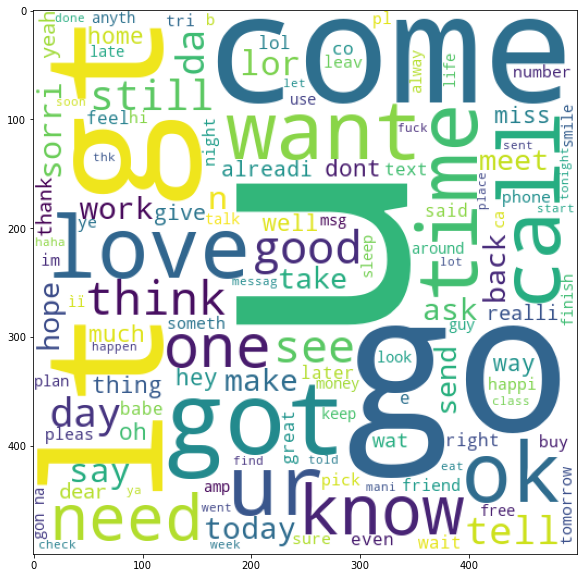

In [555]:
plt.figure(figsize = (20, 10))
plt.imshow(ham_wc)

In [556]:
# top 30 words 
# spam and ham both 

In [557]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [558]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [559]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [560]:
len(spam_corpus)

9939

In [561]:
from collections import Counter

In [562]:
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [563]:
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


/Users/vibhoosrivastava/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


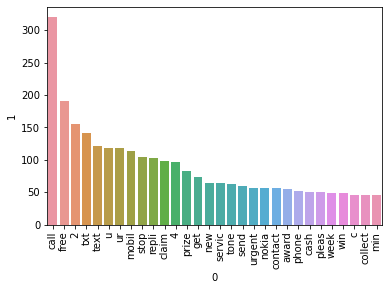

In [564]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0], pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [565]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [566]:
len(ham_corpus)

35394

In [567]:
Counter(ham_corpus).most_common(30)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 138),
 ('tell', 133),
 ('make', 129)]

In [568]:
pd.DataFrame(Counter(ham_corpus).most_common(30))

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


/Users/vibhoosrivastava/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


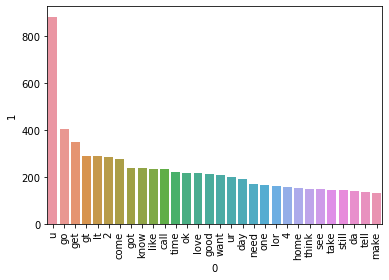

In [569]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0], pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

# Model building

In [570]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [571]:
df.shape

(5169, 6)

In [572]:
# text dataset -> Naive Bayes' algorithm

In [573]:
# text -> vectorization
# bag of words
# tfidf
# word2vec

In [574]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()

In [575]:
# sparse array -> dense array
X = cv.fit_transform(df['transformed_text']).toarray()

In [576]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [577]:
X.shape

(5169, 6708)

In [578]:
y = df['target'].values

In [579]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [580]:
from sklearn.model_selection import train_test_split

In [581]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [582]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [583]:
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [584]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [585]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

In [586]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [587]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [588]:
gnb.fit(X_train, y_train)

GaussianNB()

In [589]:
y_pred1 = gnb.predict(X_test)

In [590]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [591]:
print(accuracy_score(y_test, y_pred1))

0.8800773694390716


In [592]:
print(confusion_matrix(y_test, y_pred1))

[[792 104]
 [ 20 118]]


In [593]:
print(precision_score(y_test, y_pred1))

0.5315315315315315


In [594]:
mnb.fit(X_train, y_train)

MultinomialNB()

In [595]:
y_pred1 = mnb.predict(X_test)

In [596]:
print(accuracy_score(y_test, y_pred1))

0.9642166344294004


In [597]:
print(confusion_matrix(y_test, y_pred1))

[[871  25]
 [ 12 126]]


In [598]:
print(precision_score(y_test, y_pred1))

0.8344370860927153


In [599]:
bnb.fit(X_train, y_train)

BernoulliNB()

In [600]:
y_pred1 = bnb.predict(X_test)

In [601]:
print(accuracy_score(y_test, y_pred1))

0.9700193423597679


In [602]:
print(confusion_matrix(y_test, y_pred1))

[[893   3]
 [ 28 110]]


In [603]:
print(precision_score(y_test, y_pred1))

0.9734513274336283


In [604]:
tfidf = TfidfVectorizer()

In [605]:
# sparse array -> dense array
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [606]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [607]:
gnb.fit(X_train, y_train)

GaussianNB()

In [608]:
y_pred1 = gnb.predict(X_test)

In [609]:
print(accuracy_score(y_test, y_pred1))

0.8762088974854932


In [610]:
print(confusion_matrix(y_test, y_pred1))

[[793 103]
 [ 25 113]]


In [611]:
print(precision_score(y_test, y_pred1))

0.5231481481481481


In [612]:
mnb.fit(X_train, y_train)

MultinomialNB()

In [613]:
y_pred1 = mnb.predict(X_test)

In [614]:
print(accuracy_score(y_test, y_pred1))

0.9593810444874274


In [615]:
print(confusion_matrix(y_test, y_pred1))

[[896   0]
 [ 42  96]]


In [616]:
print(precision_score(y_test, y_pred1))

1.0


In [617]:
bnb.fit(X_train, y_train)

BernoulliNB()

In [618]:
y_pred1 = bnb.predict(X_test)

In [619]:
print(accuracy_score(y_test, y_pred1))

0.9700193423597679


In [620]:
print(confusion_matrix(y_test, y_pred1))

[[893   3]
 [ 28 110]]


In [621]:
print(precision_score(y_test, y_pred1))

0.9734513274336283


In [622]:
# here precison has higher priority than accuracy

In [623]:
# we will move forward with Multinomial Naive Bayes' algorithm

In [624]:
# choosen -> tfidf with Multinomial Naive Bayes' algorithm

 # Improvements

In [625]:
# max_features = 3000 in tfidf -> helpful

In [626]:
# other algorithms -> not helpful

In [627]:
# scaling -> not helpful

In [628]:
# appending num_character column to X -> not helpful

In [629]:
# voting classifier -> not helpful

In [630]:
# stacking -> not helpful

In [631]:
tfidf = TfidfVectorizer(max_features = 3000)

In [632]:
# sparse array -> dense array
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [633]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

In [634]:
# X = np.hstack(X, df['num_characters'].values.reshape(-1, 1)))

In [635]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [636]:
mnb.fit(X_train, y_train)

MultinomialNB()

In [637]:
y_pred1 = mnb.predict(X_test)

In [638]:
print(accuracy_score(y_test, y_pred1))

0.9709864603481625


In [639]:
print(confusion_matrix(y_test, y_pred1))

[[896   0]
 [ 30 108]]


In [640]:
print(precision_score(y_test, y_pred1))

1.0


In [641]:
# by improvements accuracy also increases for tfidf with Multinomial Naive Bayes' algorithm

# Website

In [642]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))